In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")

In [27]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [28]:
df['date'].isna().sum()

0

In [29]:
df['store'].isna().sum()

0

In [30]:
df['item'].isna().sum()

0

In [31]:
df['sales'].isna().sum()

0

In [32]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


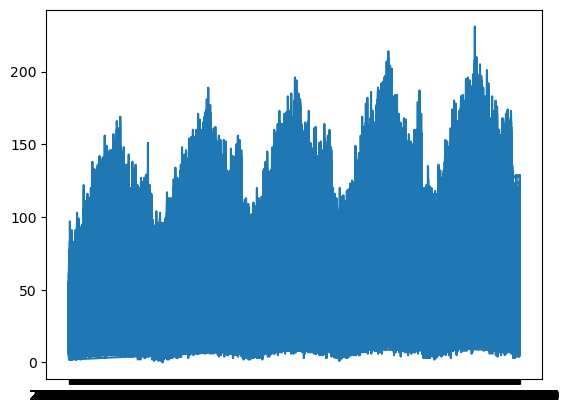

In [33]:
plt.plot(df['date'],df['sales'])

In [34]:
d1 = df[df['store']==1]

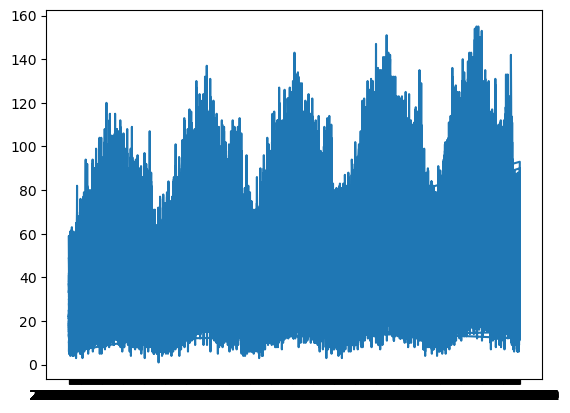

In [35]:
plt.plot(d1['date'],d1['sales'])

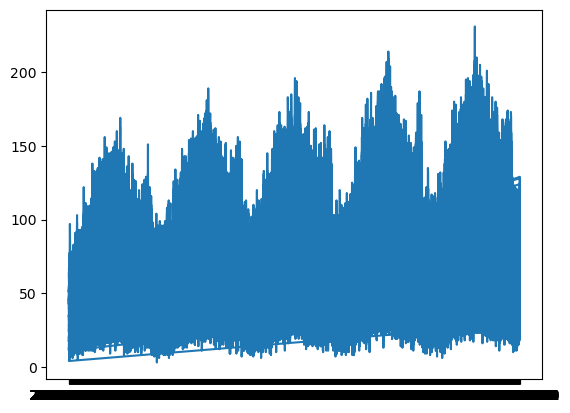

In [36]:
d2 = df[df['store']==2]
plt.plot(d2['date'],d2['sales'])

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [38]:
df['date'] = pd.to_datetime(df['date'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


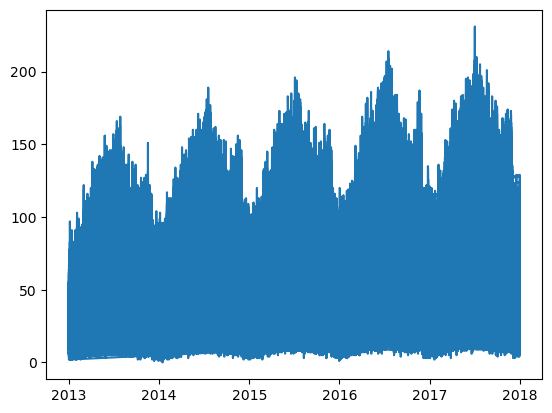

In [40]:
plt.plot(df['date'],df['sales'])

In [41]:
from statsmodels.tsa.seasonal import STL
data = df.set_index('date')
data = data.resample('D').mean()
data

,store,item,sales
date,,,
2013-01-01,5.5,25.5,27.392
2013-01-02,5.5,25.5,27.356
2013-01-03,5.5,25.5,28.976
2013-01-04,5.5,25.5,31.354
2013-01-05,5.5,25.5,32.474
...,...,...,...
2017-12-27,5.5,25.5,40.756
2017-12-28,5.5,25.5,43.770
2017-12-29,5.5,25.5,47.070


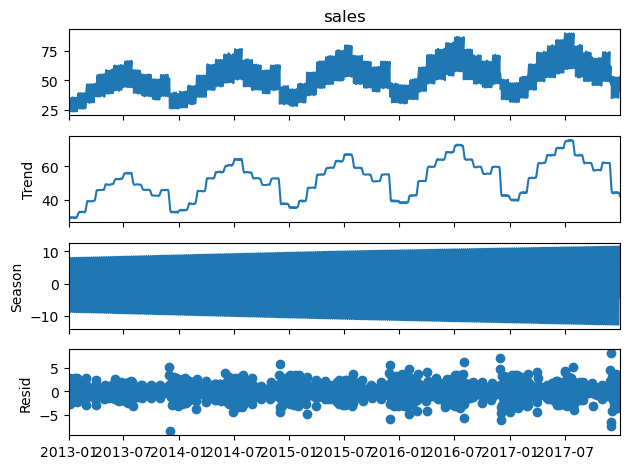

In [42]:
stl = STL(data['sales'], seasonal=365)
result = stl.fit()
result.plot()
plt.show()

In [43]:
new_series = data['sales'] - result.seasonal - result.trend

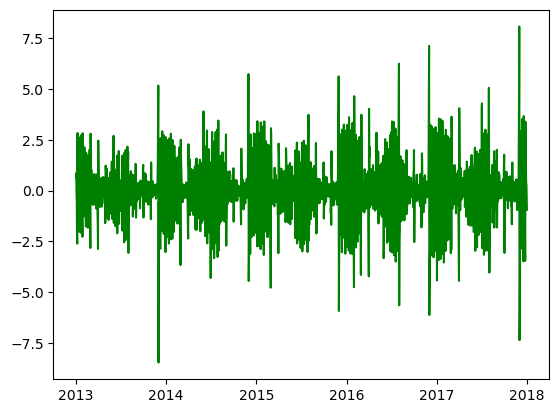

In [44]:
plt.plot(data.index, new_series, label='Deseasonalized Time Series', color='green')

In [45]:
from statsmodels.tsa.seasonal import STL
data2 = df.set_index('date')
data2 = data2.resample('M').mean()
stl = STL(data2['sales'], seasonal=13)
result2 = stl.fit()

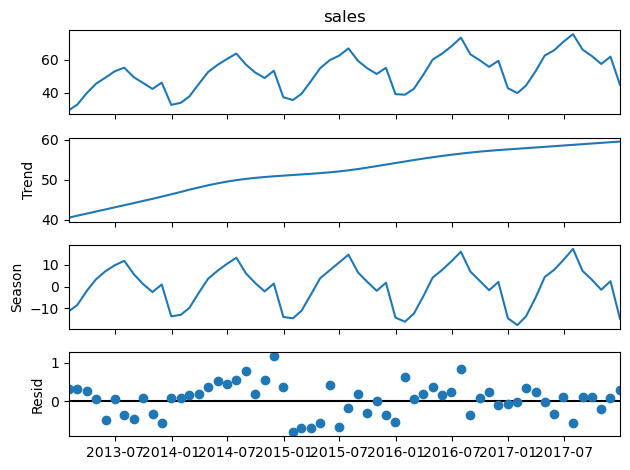

In [46]:
result2.plot()
plt.show()

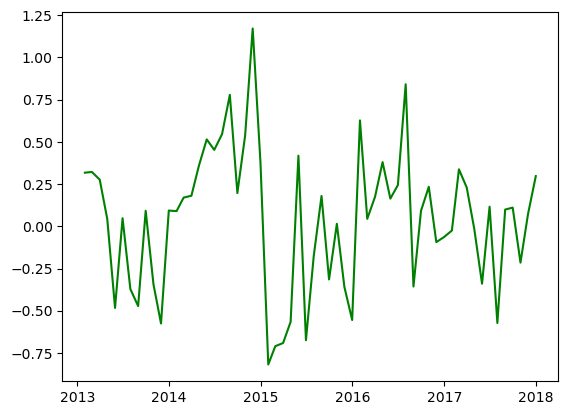

In [47]:
new_serie2 = data2['sales'] - result2.seasonal - result2.trend
plt.plot(data2.index, new_serie2, label='Deseasonalized Time Series', color='green')

In [48]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(new_series)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmneted Dickey_fuller Statistic: -15.316549
p-value: 0.000000


In [49]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(new_serie2)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmneted Dickey_fuller Statistic: -4.281139
p-value: 0.000479


In [50]:
data['new_sales'] = new_series
data

,store,item,sales,new_sales
date,,,,
2013-01-01,5.5,25.5,27.392,0.622735
2013-01-02,5.5,25.5,27.356,0.859818
2013-01-03,5.5,25.5,28.976,-0.061858
2013-01-04,5.5,25.5,31.354,-0.441442
2013-01-05,5.5,25.5,32.474,-2.184812
...,...,...,...,...
2017-12-27,5.5,25.5,40.756,0.859920
2017-12-28,5.5,25.5,43.770,0.355654
2017-12-29,5.5,25.5,47.070,0.321405


In [51]:
data3 = data.drop('sales', axis=1)
data3

,store,item,new_sales
date,,,
2013-01-01,5.5,25.5,0.622735
2013-01-02,5.5,25.5,0.859818
2013-01-03,5.5,25.5,-0.061858
2013-01-04,5.5,25.5,-0.441442
2013-01-05,5.5,25.5,-2.184812
...,...,...,...
2017-12-27,5.5,25.5,0.859920
2017-12-28,5.5,25.5,0.355654
2017-12-29,5.5,25.5,0.321405


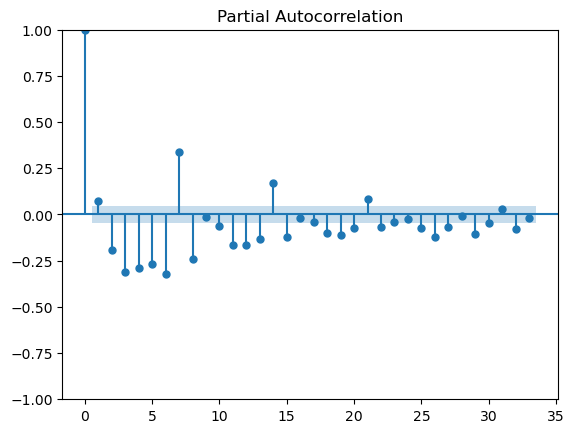

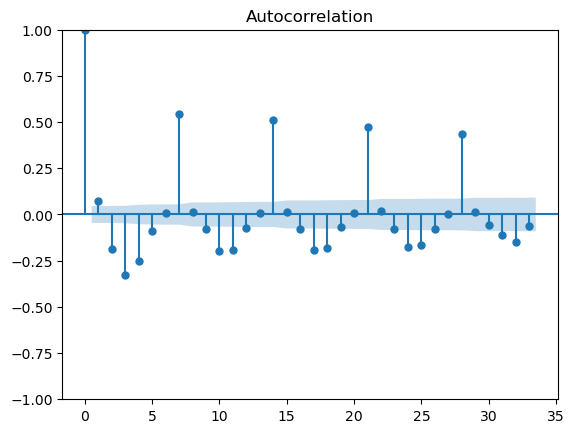

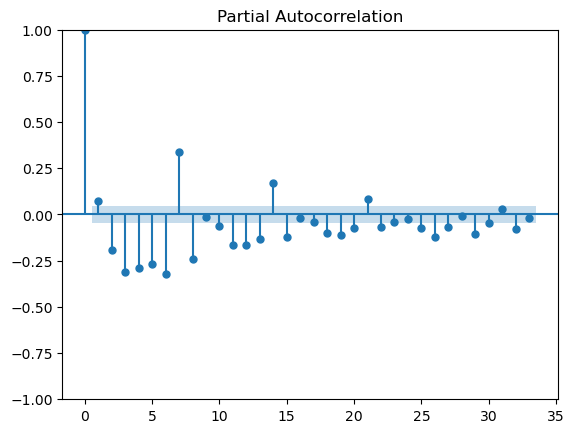

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data3['new_sales'])
plot_pacf(data3['new_sales'])

In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [57]:
arima_model = ARIMA(data3['new_sales'], order=(7, 0, 7))
arima_result = arima_model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


90
90
90
90


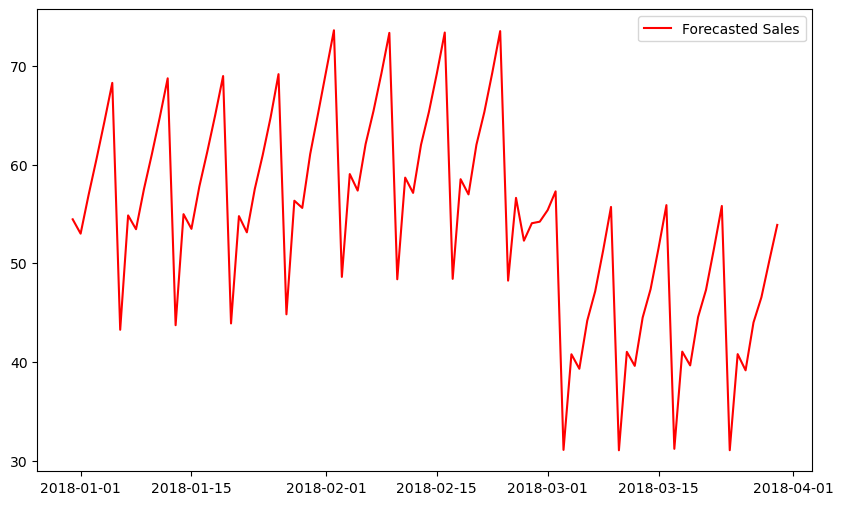

In [75]:
# Forecast future values
forecast_steps = 90  # Define the number of steps to forecast
forecast = np.array(arima_result.forecast(steps=forecast_steps))

# Add the trend and seasonal components back to the forecast
future_trend = np.array(result.trend[-forecast_steps:])  # Adjust according to your data structure
future_seasonal = np.array(result.seasonal[-forecast_steps:])  # Adjust according to your data structure
    
final_forecast = forecast + future_trend + future_seasonal

print(len(forecast))
print(len(future_trend))
print(len(future_seasonal))
print(len(final_forecast))

# Plot the final forecast
plt.figure(figsize=(10, 6))
#plt.plot(data.index, data['sales'], label='Original Sales')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='D'), final_forecast, label='Forecasted Sales', color='red')
plt.legend()
plt.show()
#df